In [1]:
# 데이터 다운
# https://www.kaggle.com/c/bike-sharing-demand/overview

### 데이트 클렌징 및 가공

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

In [4]:
warnings.filterwarnings('ignore')

bike_df = pd.read_csv('./kaggle_data/bike_train/bike_train.csv')
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [8]:
print(f'''
bike_df.shape : {bike_df.shape}
bike_df.info : {bike_df.info()}
bike_df.head : {bike_df.head(3)}
      ''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB

bike_df.shape : (10886, 12)
bike_df.info : None
bike_df.head :               datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1  

In [10]:
# datetime컬럼 datetime 속성으로 바꾸기
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# 년 월 일 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year) # 년
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month) # 월
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day) # 일
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour) # 시간
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [11]:
# 불필요 컬럼 삭제
# casual : 사전에 등록하지 않은 사용자의 자전거 대여 횟수
# registered : 사전에 등록한 사용자의 대여 횟수
# casual + registered = 총 count

drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis = 1, inplace = True)

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


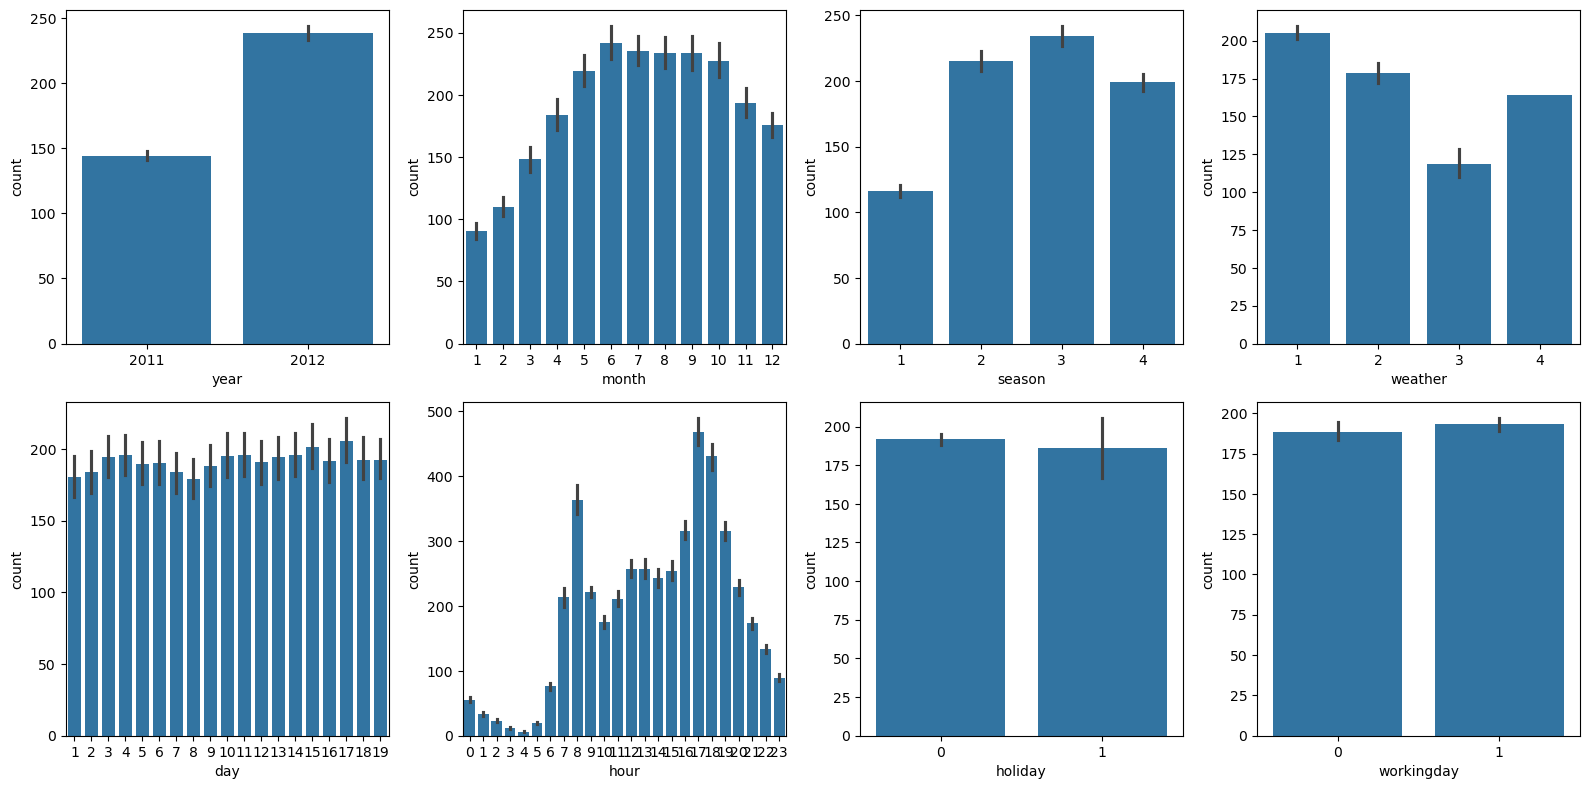

In [13]:
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']

# cat_features에 있는 모든 컬럼별로 개별 컬럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4

    # seaborn의 barplot을 이용해 컬럼값에 따른 count의 합을 표현
    sns.barplot(x = feature, y = 'count', data = bike_df, ax = axs[row][col])

plt.tight_layout()
plt.show()


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# log값 변환 시, NaN 등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error()를 이용해 RMSE 계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MAE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)

    # MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print(f'''
RMSLE : {rmsle_val:.4f}
RMSE : {rmse_val:.4f}
MAE : {mae_val:.4f}
R_squared : {r2_score(y,pred):.4f}
          ''')

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis = 1)

X_train, X_test, y_train, y_test = \
train_test_split(X_features
                 , y_target
                 , test_size = 0.3
                 , random_state = 0
                 )

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)



RMSLE : 1.1647
RMSE : 140.8996
MAE : 105.9244
R_squared : 0.3887
          


In [27]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame의 칼럼으로 실제 대여 횟수(count)와 예측값을 서로 비교할 수 있도록 생성
    result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(
                            result_df['real_count'] - result_df['predicted_count']
                            )
    
    # 예측값과 실제 값이 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot:>

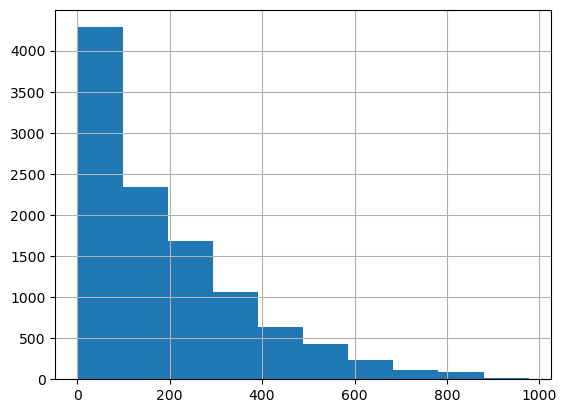

In [29]:
y_target.hist()

<AxesSubplot:>

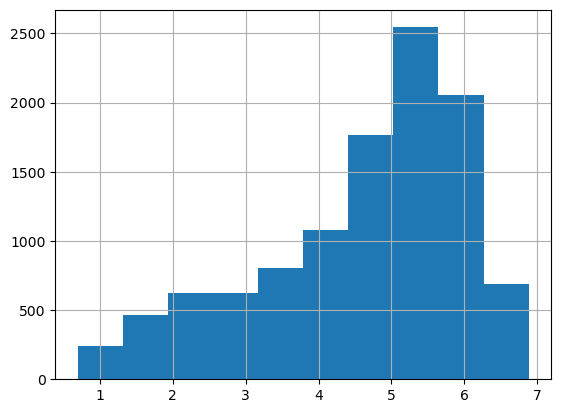

In [31]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [32]:
# 타깃 컬럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영해 학습 / 테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = \
train_test_split(X_features
                 , y_target_log
                 , test_size = 0.3
                 , random_state = 0
                 )

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)

# 테스트 데이터 세트의 Target 값은 log 변환되었으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

# 예측값 역시 log 변환된 타깃 기반으로 학습돼 예측되었으므로, 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)


RMSLE : 1.0168
RMSE : 162.5943
MAE : 109.2862
R_squared : 0.1859
          


In [50]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 피처의 관계성 - 다중 공선성, 상관관계
X_check = bike_df[['temp', 'atemp', 'holiday', 'workingday', 'season']]
X_with_const = add_constant(X_check)
X_vlf_df = pd.DataFrame()
X_vlf_df['Feature'] = X_with_const.columns
X_vlf_df['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
X_vlf_df

,Feature,VIF
0,const,14.366430
1,temp,33.568616
2,atemp,33.673455
3,holiday,1.069674
4,workingday,1.069512
5,season,1.076713


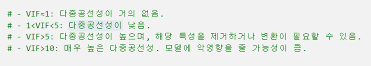

In [60]:
X_check.corr()

,temp,atemp,holiday,workingday,season
temp,1.000000,0.984948,0.000295,0.029966,0.258689
atemp,0.984948,1.000000,-0.005215,0.024660,0.264744
holiday,0.000295,-0.005215,1.000000,-0.250491,0.029368
workingday,0.029966,0.024660,-0.250491,1.000000,-0.008126
season,0.258689,0.264744,0.029368,-0.008126,1.000000


<AxesSubplot:ylabel='None'>

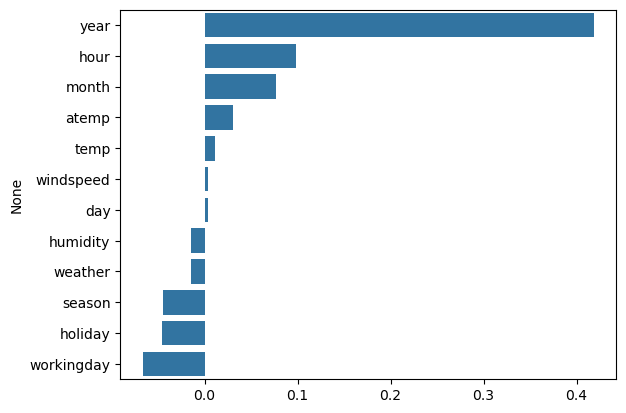

In [34]:
coef = pd.Series(lr_reg.coef_
               , index = X_features.columns)

coef_sort = coef.sort_values(ascending=False)
sns.barplot(x = coef_sort.values
            , y = coef_sort.index)

In [36]:
X_features_ohe = pd.get_dummies(X_features, columns = ['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])
X_features_ohe

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [46]:
X_train, X_test, y_train, y_test = \
                                train_test_split(X_features_ohe
                                                , y_target_log
                                                , test_size=0.3
                                                , random_state=0
                                                )

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print(f'''
    {'*'* 50}
        {model.__class__.__name__}
    {'*'* 50}
    ''')
    evaluate_regr(y_test, pred)

# 모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = True)


    **************************************************
        LinearRegression
    **************************************************
    

RMSLE : 0.5896
RMSE : 97.6880
MAE : 63.3821
R_squared : 0.7061
          

    **************************************************
        Ridge
    **************************************************
    

RMSLE : 0.5901
RMSE : 98.5286
MAE : 63.8934
R_squared : 0.7011
          

    **************************************************
        Lasso
    **************************************************
    

RMSLE : 0.6348
RMSE : 113.2188
MAE : 72.8027
R_squared : 0.6053
          


### 하이퍼 파라미터 튜닝

In [ ]:
하기

<AxesSubplot:ylabel='None'>

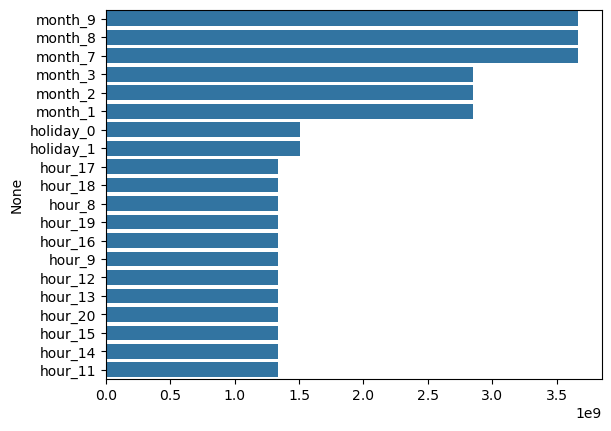

In [38]:
coef = pd.Series(lr_reg.coef_, index = X_features_ohe.columns)
coef_sort = coef.sort_values(ascending = False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [61]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators = 500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators = 500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력될 경우 버전에 따라 오류 발생 가능. ndarray로 변환
    get_model_predict(model
                      , X_train.values
                      , X_test.values
                      , y_train.values
                      , y_test.values
                      , is_expm1 = True)


    **************************************************
        RandomForestRegressor
    **************************************************
    

RMSLE : 0.3549
RMSE : 50.2562
MAE : 31.1893
R_squared : 0.9222
          

    **************************************************
        GradientBoostingRegressor
    **************************************************
    

RMSLE : 0.3299
RMSE : 53.3445
MAE : 32.7483
R_squared : 0.9124
          

    **************************************************
        XGBRegressor
    **************************************************
    

RMSLE : 0.3422
RMSE : 51.7316
MAE : 31.2512
R_squared : 0.9176
          

    **************************************************
        LGBMRegressor
    **************************************************
    

RMSLE : 0.3188
RMSE : 47.2146
MAE : 29.0288
R_squared : 0.9314
          
